# 데이터 시각화

In [2]:
# pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install basemap

  Using cached basemap-1.3.4-cp39-cp39-win_amd64.whl (443 kB)
  Using cached pyproj-3.3.1-cp39-cp39-win_amd64.whl (6.4 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# 180824_06

[[124.707214 124.75104  124.79483  ... 130.1817   130.2254   130.2691  ]
 [124.70648  124.750336 124.79419  ... 130.18399  130.22772  130.27145 ]
 [124.70578  124.749664 124.79352  ... 130.18628  130.23004  130.2738  ]
 ...
 [124.612274 124.6593   124.70633  ... 130.48822  130.5351   130.582   ]
 [124.61145  124.65851  124.70557  ... 130.49084  130.53778  130.58469 ]
 [124.61066  124.657715 124.704834 ... 130.49347  130.54044  130.5874  ]]
[[33.629913 33.630497 33.631054 ... 33.547607 33.54569  33.543755]
 [33.6664   33.666973 33.667538 ... 33.584038 33.58212  33.58018 ]
 [33.702885 33.70347  33.704025 ... 33.62047  33.618546 33.61662 ]
 ...
 [38.221478 38.222107 38.222713 ... 38.131996 38.129913 38.12782 ]
 [38.258427 38.259056 38.259663 ... 38.16889  38.166805 38.164696]
 [38.295383 38.296013 38.296623 ... 38.20578  38.203693 38.20159 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [

<Figure size 864x720 with 0 Axes>

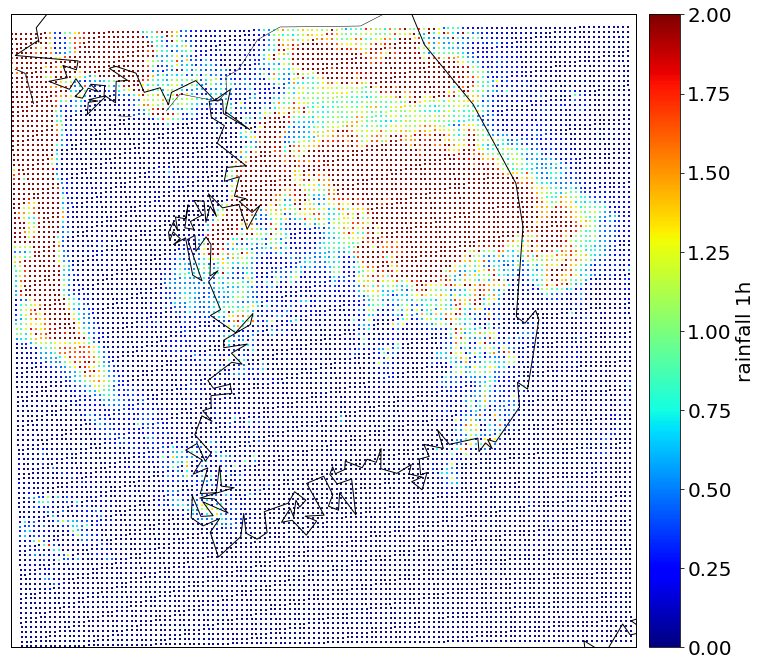

In [25]:
f_nc = Dataset('data/RDR_data_2016_2018/2018/20180824/RDR_avg1h_128_4km_2018-08-24_06_00_00.nc')  # 첫 번째 파일
f_nc

# 위도
xlon = f_nc.variables['XLON'][:]
print(xlon)

# 경도
xlat = f_nc.variables['XLAT'][:]
print(xlat)

# 1시간 누적
rain1h = f_nc.variables['rain1h'][:]
# rain1h = rain1h.data
print(rain1h)

%matplotlib inline
# define plot size in inches (width, height) & resolution(DPI)
plt.figure(figsize=(12, 10))


fig = plt.figure(figsize=[12,15])

# m = Basemap(width=1500000,height=1000000,
#             resolution='l',projection='stere',
#             lat_0=35.5,
#             lon_0=130.
#            )

m =  Basemap(projection='stere', lat_0=35.96, lon_0=124.65, resolution = 'l',
    urcrnrlat=38.29, llcrnrlat=33.62, llcrnrlon=124.61, urcrnrlon=130.68)

# style
# plt.style.use('seaborn-darkgrid')

# define font size
plt.rc("font", size=20)
plt.rcParams['font.family'] = 'New Century Schoolbook'
# rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams['axes.labelsize'] = 22
# plt.rcParams['xtick.labelsize'] = 22
# plt.rcParams['ytick.labelsize'] = 22
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titleweight"] = "bold"

# m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 0)
# c (crude) < l (low) < i (intermediate) < h (high) < f (full)
# Source: http://seesaawiki.jp/met-python/d/Basemap

X, Y = m(xlon, xlat)
VAL  = rain1h
# print(VAL)

m.scatter(X, Y, c=VAL, s=1.0, marker="s", zorder=1, vmin=0, vmax=2, cmap=plt.cm.get_cmap('jet'), alpha=1.0)  # np.mean(rain1h)
m.colorbar(location='right', label='rainfall 1h')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-90,91,30),labels=[1,0,0,0],dashes=[2,2])
m.drawmeridians(np.arange(0,361,60),labels=[0,0,0,1],dashes=[2,2]) 

# plt.title('Aqua / CERES  2015.07.15 00-23 UTC \n')
# plt.savefig("FIG/Scane_analysis_Himawari-8_AHI_RSR.png")
plt.show()

# 170824_16

[[124.707214 124.75104  124.79483  ... 130.1817   130.2254   130.2691  ]
 [124.70648  124.750336 124.79419  ... 130.18399  130.22772  130.27145 ]
 [124.70578  124.749664 124.79352  ... 130.18628  130.23004  130.2738  ]
 ...
 [124.612274 124.6593   124.70633  ... 130.48822  130.5351   130.582   ]
 [124.61145  124.65851  124.70557  ... 130.49084  130.53778  130.58469 ]
 [124.61066  124.657715 124.704834 ... 130.49347  130.54044  130.5874  ]]
[[33.629913 33.630497 33.631054 ... 33.547607 33.54569  33.543755]
 [33.6664   33.666973 33.667538 ... 33.584038 33.58212  33.58018 ]
 [33.702885 33.70347  33.704025 ... 33.62047  33.618546 33.61662 ]
 ...
 [38.221478 38.222107 38.222713 ... 38.131996 38.129913 38.12782 ]
 [38.258427 38.259056 38.259663 ... 38.16889  38.166805 38.164696]
 [38.295383 38.296013 38.296623 ... 38.20578  38.203693 38.20159 ]]
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.

<Figure size 864x720 with 0 Axes>

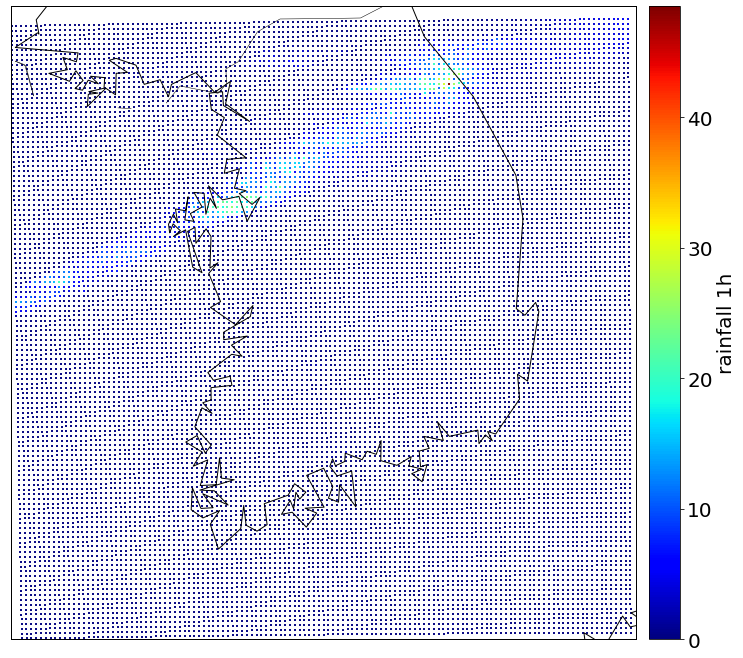

In [30]:
f_nc = Dataset('data/RDR_data_2016_2018/2017/20170824/RDR_avg1h_128_4km_2017-08-24_16_00_00.nc')  # 첫 번째 파일
f_nc

# 위도
xlon = f_nc.variables['XLON'][:]
print(xlon)

# 경도
xlat = f_nc.variables['XLAT'][:]
print(xlat)

# 1시간 누적
rain1h = f_nc.variables['rain1h'][:]
# rain1h = rain1h.data
print(rain1h)

%matplotlib inline
# define plot size in inches (width, height) & resolution(DPI)
plt.figure(figsize=(12, 10))


fig = plt.figure(figsize=[12,15])

# m = Basemap(width=1500000,height=1000000,
#             resolution='l',projection='stere',
#             lat_0=35.5,
#             lon_0=130.
#            )

m =  Basemap(projection='stere', lat_0=35.96, lon_0=124.65, resolution = 'l',
    urcrnrlat=38.29, llcrnrlat=33.62, llcrnrlon=124.61, urcrnrlon=130.68)

# style
# plt.style.use('seaborn-darkgrid')

# define font size
plt.rc("font", size=20)
plt.rcParams['font.family'] = 'New Century Schoolbook'
# rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams['axes.labelsize'] = 22
# plt.rcParams['xtick.labelsize'] = 22
# plt.rcParams['ytick.labelsize'] = 22
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titleweight"] = "bold"

# m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 0)
# c (crude) < l (low) < i (intermediate) < h (high) < f (full)
# Source: http://seesaawiki.jp/met-python/d/Basemap

X, Y = m(xlon, xlat)
VAL  = rain1h
# print(VAL)

m.scatter(X, Y, c=VAL, s=1.0, marker="s", zorder=1, vmin=0, vmax=np.mean(rain1h), cmap=plt.cm.get_cmap('jet'), alpha=1.0) 
m.colorbar(location='right', label='rainfall 1h')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-90,91,30),labels=[1,0,0,0],dashes=[2,2])
m.drawmeridians(np.arange(0,361,60),labels=[0,0,0,1],dashes=[2,2]) 

# plt.title('Aqua / CERES  2015.07.15 00-23 UTC \n')
# plt.savefig("FIG/Scane_analysis_Himawari-8_AHI_RSR.png")
plt.show()

# 150824_06

[[124.707214 124.75104  124.79483  ... 130.1817   130.2254   130.2691  ]
 [124.70648  124.750336 124.79419  ... 130.18399  130.22772  130.27145 ]
 [124.70578  124.749664 124.79352  ... 130.18628  130.23004  130.2738  ]
 ...
 [124.612274 124.6593   124.70633  ... 130.48822  130.5351   130.582   ]
 [124.61145  124.65851  124.70557  ... 130.49084  130.53778  130.58469 ]
 [124.61066  124.657715 124.704834 ... 130.49347  130.54044  130.5874  ]]
[[33.629913 33.630497 33.631054 ... 33.547607 33.54569  33.543755]
 [33.6664   33.666973 33.667538 ... 33.584038 33.58212  33.58018 ]
 [33.702885 33.70347  33.704025 ... 33.62047  33.618546 33.61662 ]
 ...
 [38.221478 38.222107 38.222713 ... 38.131996 38.129913 38.12782 ]
 [38.258427 38.259056 38.259663 ... 38.16889  38.166805 38.164696]
 [38.295383 38.296013 38.296623 ... 38.20578  38.203693 38.20159 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [

<Figure size 864x720 with 0 Axes>

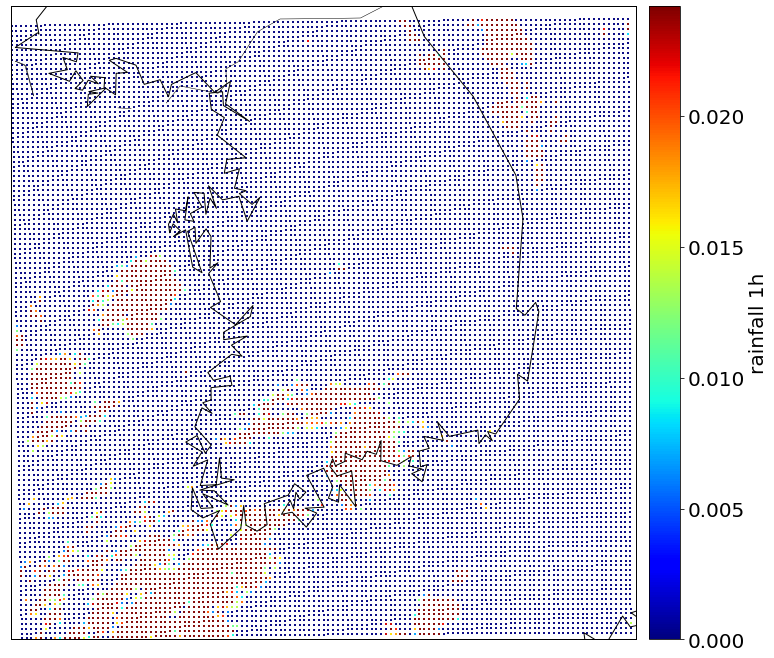

In [22]:
f_nc = Dataset('data/RDR_data_2012-2015/2015/20150824/RDR_avg1h_128_4km_2015-08-24_06_00_00.nc')  # 첫 번째 파일
f_nc

# 위도
xlon = f_nc.variables['XLON'][:]
print(xlon)

# 경도
xlat = f_nc.variables['XLAT'][:]
print(xlat)

# 1시간 누적
rain1h = f_nc.variables['rain1h'][:]
# rain1h = rain1h.data
print(rain1h)

%matplotlib inline
# define plot size in inches (width, height) & resolution(DPI)
plt.figure(figsize=(12, 10))


fig = plt.figure(figsize=[12,15])

# m = Basemap(width=1500000,height=1000000,
#             resolution='l',projection='stere',
#             lat_0=35.5,
#             lon_0=130.
#            )

m =  Basemap(projection='stere', lat_0=35.96, lon_0=124.65, resolution = 'l',
    urcrnrlat=38.29, llcrnrlat=33.62, llcrnrlon=124.61, urcrnrlon=130.68)

# style
# plt.style.use('seaborn-darkgrid')

# define font size
plt.rc("font", size=20)
plt.rcParams['font.family'] = 'New Century Schoolbook'
# rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams['axes.labelsize'] = 22
# plt.rcParams['xtick.labelsize'] = 22
# plt.rcParams['ytick.labelsize'] = 22
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titleweight"] = "bold"

# m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 0)
# c (crude) < l (low) < i (intermediate) < h (high) < f (full)
# Source: http://seesaawiki.jp/met-python/d/Basemap

X, Y = m(xlon, xlat)
VAL  = rain1h
# print(VAL)

m.scatter(X, Y, c=VAL, s=1.0, marker="s", zorder=1, vmin=0, vmax=np.mean(rain1h), cmap=plt.cm.get_cmap('jet'), alpha=1.0) 
m.colorbar(location='right', label='rainfall 1h')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-90,91,30),labels=[1,0,0,0],dashes=[2,2])
m.drawmeridians(np.arange(0,361,60),labels=[0,0,0,1],dashes=[2,2]) 

# plt.title('Aqua / CERES  2015.07.15 00-23 UTC \n')
# plt.savefig("FIG/Scane_analysis_Himawari-8_AHI_RSR.png")
plt.show()

In [ ]:
## vmax 값을 어떻게 설정할지 => max로 둘지, mean으로 둘지, 임의로 1이나 2로 둘지 => max로 두게 되면 값 범위 내 차이가 크고(정규화?!)
# mean으로 두거나 다른 값으로 설정하면 범위 값은 설정 못하게 됨

# unet으로 예측해보고 결과를 시각화할 예정.
# http://machinelearningkorea.com/2019/08/25/u-net-%EC%8B%A4%EC%A0%9C-%EA%B5%AC%ED%98%84-%EC%BD%94%EB%93%9C/

In [ ]:
#_____________________________________________________________________

In [2]:
f_nc = Dataset('data/RDR_data_2016_2018/2018/20180824/RDR_avg1h_128_4km_2018-08-24_06_00_00.nc')  # 첫 번째 파일
f_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): time(0), south_north(128), west_east(128)
    variables(dimensions): float32 XLAT(south_north, west_east), float32 XLON(south_north, west_east), float32 rain1h(south_north, west_east)
    groups: 

In [3]:
# 위도
xlon = f_nc.variables['XLON'][:]
print(xlon)

[[124.707214 124.75104  124.79483  ... 130.1817   130.2254   130.2691  ]
 [124.70648  124.750336 124.79419  ... 130.18399  130.22772  130.27145 ]
 [124.70578  124.749664 124.79352  ... 130.18628  130.23004  130.2738  ]
 ...
 [124.612274 124.6593   124.70633  ... 130.48822  130.5351   130.582   ]
 [124.61145  124.65851  124.70557  ... 130.49084  130.53778  130.58469 ]
 [124.61066  124.657715 124.704834 ... 130.49347  130.54044  130.5874  ]]


In [4]:
# 경도
xlat = f_nc.variables['XLAT'][:]
print(xlat)

[[33.629913 33.630497 33.631054 ... 33.547607 33.54569  33.543755]
 [33.6664   33.666973 33.667538 ... 33.584038 33.58212  33.58018 ]
 [33.702885 33.70347  33.704025 ... 33.62047  33.618546 33.61662 ]
 ...
 [38.221478 38.222107 38.222713 ... 38.131996 38.129913 38.12782 ]
 [38.258427 38.259056 38.259663 ... 38.16889  38.166805 38.164696]
 [38.295383 38.296013 38.296623 ... 38.20578  38.203693 38.20159 ]]


In [5]:
(xlat.data[127][0] - xlat.data[0][0])/2 + xlat.data[0][0]

35.96264839172363

In [6]:
# 1시간 누적
rain1h = f_nc.variables['rain1h'][:]
# rain1h = rain1h.data
rain1h

masked_array(
  data=[[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [5.5017548 , 3.635893  , 3.8316283 , ..., 0.        , 0.        ,
         0.        ],
        [5.488368  , 3.6134608 , 3.0858004 , ..., 0.        , 0.        ,
         0.01635705],
        [5.4382434 , 5.422833  , 4.352847  , ..., 0.        , 0.        ,
         0.        ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [7]:
# a = np.array([[[1,2,3],[1,0,0],[0,2,3]]])
# b = np.squeeze(a)
# a.shape
# b.shape

(3, 3)

In [8]:
# # np.squeeze(rain1h[:,:])
# # rain1h
# np.array_equal(np.squeeze(rain1h[:,:]), rain1h)

True

<Figure size 864x720 with 0 Axes>

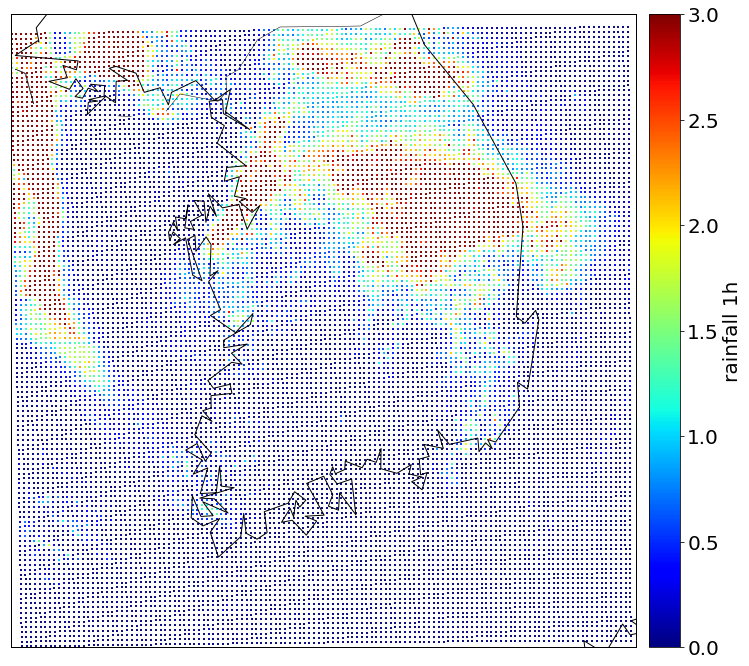

In [10]:
%matplotlib inline
# define plot size in inches (width, height) & resolution(DPI)
plt.figure(figsize=(12, 10))


fig = plt.figure(figsize=[12,15])

# m = Basemap(width=1500000,height=1000000,
#             resolution='l',projection='stere',
#             lat_0=35.5,
#             lon_0=130.
#            )

m =  Basemap(projection='stere', lat_0=35.96, lon_0=124.65, resolution = 'l',
    urcrnrlat=38.29, llcrnrlat=33.62, llcrnrlon=124.61, urcrnrlon=130.68)

# style
# plt.style.use('seaborn-darkgrid')

# define font size
plt.rc("font", size=20)
plt.rcParams['font.family'] = 'New Century Schoolbook'
# rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams['axes.labelsize'] = 22
# plt.rcParams['xtick.labelsize'] = 22
# plt.rcParams['ytick.labelsize'] = 22
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titleweight"] = "bold"

# m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 0)
# c (crude) < l (low) < i (intermediate) < h (high) < f (full)
# Source: http://seesaawiki.jp/met-python/d/Basemap

X, Y = m(xlon, xlat)
VAL  = rain1h
# print(VAL)

m.scatter(X, Y, c=VAL, s=1.0, marker="s", zorder=1, vmin=0, vmax=3, cmap=plt.cm.get_cmap('jet'), alpha=1.0) 
m.colorbar(location='right', label='rainfall 1h')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-90,91,30),labels=[1,0,0,0],dashes=[2,2])
m.drawmeridians(np.arange(0,361,60),labels=[0,0,0,1],dashes=[2,2]) 

# plt.title('Aqua / CERES  2015.07.15 00-23 UTC \n')
# plt.savefig("FIG/Scane_analysis_Himawari-8_AHI_RSR.png")
plt.show()

C:\Users\YOUNJE~1\AppData\Local\Temp/ipykernel_16220/3493428739.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xlat, xlon, np.squeeze(rain1h[:,:]))     # 표기하고자 하는 데이터 적기
C:\Users\younjeongOh\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


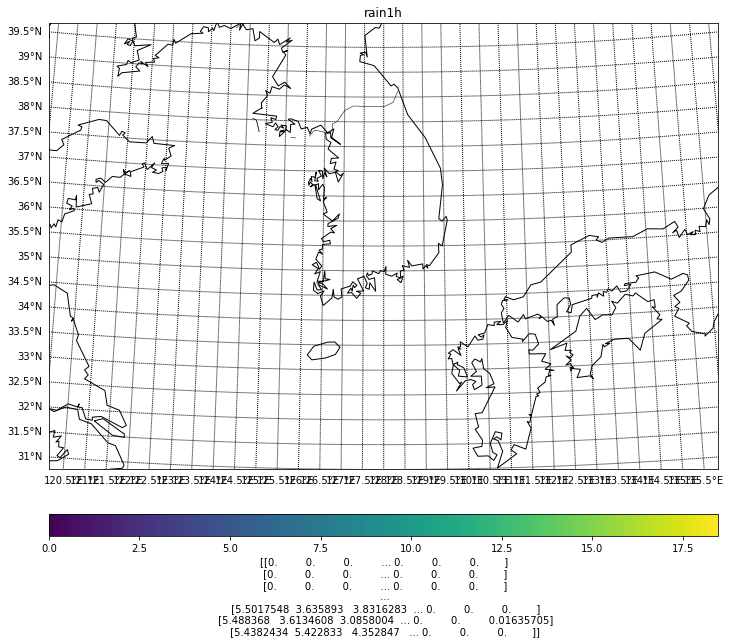

In [73]:
fig = plt.figure(figsize=[12,15])
m = Basemap(width=1500000,height=1000000,
            resolution='l',projection='stere',
            lat_0=35.5,
            lon_0=128.
           )

# x,y = m(xlon, rain1h)
# m.plot(x, y,'bo', markersize=12)

# plt.show()


# Plot Data
cs = m.pcolor(xlat, xlon, np.squeeze(rain1h[:,:]))     # 표기하고자 하는 데이터 적기
cs


# Add Grid Lines
m.drawparallels(np.arange(-80., 81., .5), labels=[5,0,0,0], fontsize=10) # from, to, diff
m.drawmeridians(np.arange(-180., 181., .5), labels=[0,0,0,5], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(rain1h)              # sshaunit

# Add Title
plt.title('rain1h')

plt.show()

# 모델 pySTEPS